## Chapter 7

First code snippet

In [1]:
def heightToWeight(height, a, b):
    return a + b * height

Second code snippet

In [2]:
import pandas as pd
df = pd.read_csv('data/01_heights_weights_genders.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(df[['Height']], df['Weight'])

print (model.intercept_, model.coef_)

-350.73719181213744 [7.71728764]


Third code snippet

In [4]:
def squaredError(heights_weights, a, b):
    predictions = heightToWeight(heights_weights['Height'], a, b)
    errors = heights_weights['Weight'] - predictions
    return sum(errors * errors)

Fourth code snippet

In [5]:
for a in range(-1, 2):
    for b in range(-1, 2):
        print (a, b, squaredError(df, a, b))

-1 -1 536271759.10086393
-1 0 274177182.8822732
-1 1 100471706.26573476
0 -1 531705600.7691093
0 0 270938375.7456164
0 1 98560250.32417507
1 -1 527159442.4373549
1 0 267719568.60895738
1 1 96668794.3826145


Fifth code snippet

In [6]:
import numpy as np
from scipy.optimize import minimize

def optim(x):
    return squaredError(df, x[0], x[1])

res = minimize(optim, [0,0], method='nelder-mead', options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 1492934.839491
         Iterations: 146
         Function evaluations: 288


In [7]:
print('Using LinearRegression', model.intercept_, model.coef_)
print('Using minimize function (squared error)', res.x)

Using LinearRegression -350.73719181213744 [7.71728764]
Using minimize function (squared error) [-350.73717477    7.71728738]


Sixth code snippet

In [8]:
def aError(a):
    return squaredError(df, a, 0)

Seventh code snippet

C:\Users\dazb\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\dazb\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


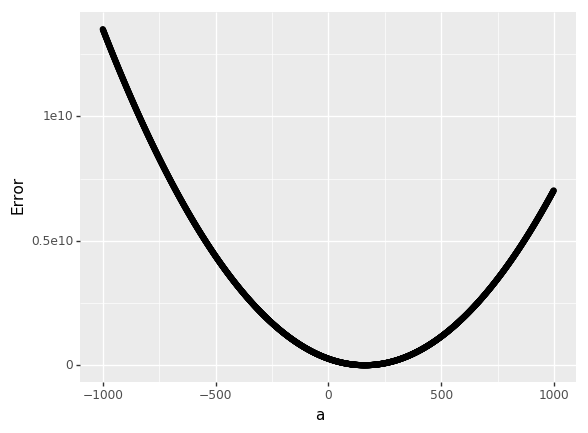

<ggplot: (179974335394)>

In [9]:
%matplotlib inline
from plotnine import *

df_a_error = pd.DataFrame({}, columns = ['a', 'Error'])

for a in range(-1000, 1000):
    df_a_error = df_a_error.append({'a': a, 'Error': aError(a)}, ignore_index=True)

fig = (
    ggplot(data = df_a_error, mapping=aes(x = 'a',  y = 'Error')) +
    geom_point() +
    geom_line()
)

fig

Eighth code snippet

C:\Users\dazb\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\dazb\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


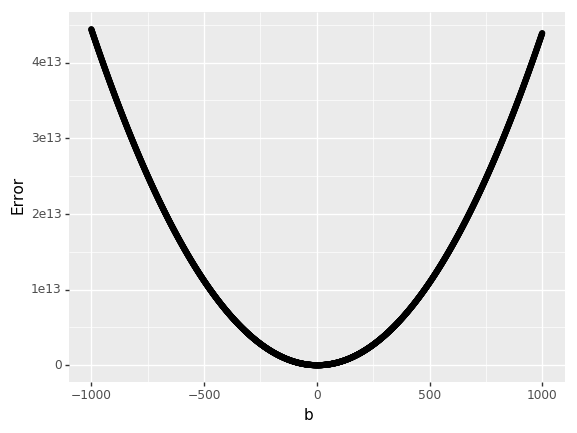

<ggplot: (179976513165)>

In [10]:
def bError(b):
    return squaredError(df, 0, b)

df_b_error = pd.DataFrame({}, columns = ['b', 'Error'])

for b in range(-1000, 1000):
    df_b_error = df_b_error.append({'b': b, 'Error': bError(b)}, ignore_index=True)

fig = (
    ggplot(data = df_b_error, mapping=aes(x = 'b',  y = 'Error')) +
    geom_point() +
    geom_line()
)

fig